In [1]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import re
from collections import defaultdict

In [3]:
import pathlib
from pathlib import Path
import pandas as pd

In [12]:
df = pd.read_csv('preprocessed_dataset.csv')

In [9]:
preprocessed_dataset.nunique()

Unnamed: 0            309
Mask_file             285
Gt_source_file         57
Gt_mask_file           57
Label                 156
J_value              2443
merged_image_path    2820
dtype: int64

In [17]:
preprocessed_dataset[preprocessed_dataset.J_value ==0]

,Unnamed: 0,Mask_file,Gt_source_file,Gt_mask_file,Label,J_value,merged_image_path
130,130,inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...,inputs-2020-07/BF-C2DL-HSC/02/t1585.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg15...,83,0.0,test_out/inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/...
292,292,inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...,inputs-2020-07/BF-C2DL-HSC/02/t1748.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg17...,140,0.0,test_out/inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/...
1130,2,inputs-2020-07/BF-C2DL-HSC/DREX-US/02_RES/mask...,inputs-2020-07/BF-C2DL-HSC/02/t0056.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,1,0.0,test_out/inputs-2020-07/BF-C2DL-HSC/DREX-US/02...
1136,8,inputs-2020-07/BF-C2DL-HSC/DREX-US/02_RES/mask...,inputs-2020-07/BF-C2DL-HSC/02/t0448.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg04...,1,0.0,test_out/inputs-2020-07/BF-C2DL-HSC/DREX-US/02...
1137,9,inputs-2020-07/BF-C2DL-HSC/DREX-US/02_RES/mask...,inputs-2020-07/BF-C2DL-HSC/02/t0448.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg04...,2,0.0,test_out/inputs-2020-07/BF-C2DL-HSC/DREX-US/02...
...,...,...,...,...,...,...,...
2251,250,inputs-2020-07/BF-C2DL-HSC/KTH-SE (5)/01_RES/m...,inputs-2020-07/BF-C2DL-HSC/01/t1743.tif,inputs-2020-07/BF-C2DL-HSC/01_GT/SEG/man_seg17...,8,0.0,test_out/inputs-2020-07/BF-C2DL-HSC/KTH-SE (5)...
2252,251,inputs-2020-07/BF-C2DL-HSC/KTH-SE (5)/01_RES/m...,inputs-2020-07/BF-C2DL-HSC/01/t1743.tif,inputs-2020-07/BF-C2DL-HSC/01_GT/SEG/man_seg17...,9,0.0,test_out/inputs-2020-07/BF-C2DL-HSC/KTH-SE (5)...
2255,254,inputs-2020-07/BF-C2DL-HSC/KTH-SE (5)/01_RES/m...,inputs-2020-07/BF-C2DL-HSC/01/t1743.tif,inputs-2020-07/BF-C2DL-HSC/01_GT/SEG/man_seg17...,12,0.0,test_out/inputs-2020-07/BF-C2DL-HSC/KTH-SE (5)...
2586,21,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/01_RES/m...,inputs-2020-07/BF-C2DL-HSC/01/t0659.tif,inputs-2020-07/BF-C2DL-HSC/01_GT/SEG/man_seg06...,1,0.0,test_out/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE...


In [22]:
preprocessed_dataset.loc[292].merged_image_path

'test_out/inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/mask1748_140.tif'

In [14]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df'

# Step 1: Count the number of rows for each Gt_source_file
file_counts = df['Gt_source_file'].value_counts().reset_index()
file_counts.columns = ['Gt_source_file', 'count']

# Step 2: Calculate the target number of rows for the training set (80%)
target_train_rows = int(len(df) * 0.8)

# Step 3: Initialize lists for train and val
train_files = []
val_files = []
current_train_rows = 0

# Step 4: Distribute files to train and val sets
for _, row in file_counts.iterrows():
    if current_train_rows < target_train_rows:
        train_files.append(row['Gt_source_file'])
        current_train_rows += row['count']
    else:
        val_files.append(row['Gt_source_file'])

# Step 5: Split the DataFrame
train_df = df[df['Gt_source_file'].isin(train_files)]
val_df = df[df['Gt_source_file'].isin(val_files)]

# Print the shapes to verify
print(f"Original DataFrame shape: {df.shape}")
print(f"Training set shape: {train_df.shape}")
print(f"Validation set shape: {val_df.shape}")

# Verify that Gt_source_file is not in both sets
train_files_set = set(train_df['Gt_source_file'].unique())
val_files_set = set(val_df['Gt_source_file'].unique())
common_files = train_files_set.intersection(val_files_set)
print(f"Number of Gt_source_file in both sets: {len(common_files)}")

# Calculate split percentages
train_percentage = len(train_df) / len(df) * 100
val_percentage = len(val_df) / len(df) * 100
print(f"Training set: {train_percentage:.2f}%")
print(f"Validation set: {val_percentage:.2f}%")

Original DataFrame shape: (2820, 7)
Training set shape: (2285, 7)
Validation set shape: (535, 7)
Number of Gt_source_file in both sets: 0
Training set: 81.03%
Validation set: 18.97%


In [11]:
df

,Unnamed: 0,Mask_file,Gt_source_file,Gt_mask_file,Label,J_value,merged_image_path,split
0,0,inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...,inputs-2020-07/BF-C2DL-HSC/02/t0046.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,1,0.861789,test_out/inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/...,train
1,1,inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...,inputs-2020-07/BF-C2DL-HSC/02/t0046.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,2,0.830097,test_out/inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/...,train
2,2,inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...,inputs-2020-07/BF-C2DL-HSC/02/t0056.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,1,0.780928,test_out/inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/...,train
3,3,inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...,inputs-2020-07/BF-C2DL-HSC/02/t0056.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,2,0.720430,test_out/inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/...,train
4,4,inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...,inputs-2020-07/BF-C2DL-HSC/02/t0287.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg02...,1,0.863874,test_out/inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/...,train
...,...,...,...,...,...,...,...,...
2815,250,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/01_RES/m...,inputs-2020-07/BF-C2DL-HSC/01/t1743.tif,inputs-2020-07/BF-C2DL-HSC/01_GT/SEG/man_seg17...,8,0.849624,test_out/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE...,val
2816,251,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/01_RES/m...,inputs-2020-07/BF-C2DL-HSC/01/t1743.tif,inputs-2020-07/BF-C2DL-HSC/01_GT/SEG/man_seg17...,9,0.820433,test_out/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE...,val
2817,252,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/01_RES/m...,inputs-2020-07/BF-C2DL-HSC/01/t1743.tif,inputs-2020-07/BF-C2DL-HSC/01_GT/SEG/man_seg17...,10,0.863222,test_out/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE...,val
2818,253,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/01_RES/m...,inputs-2020-07/BF-C2DL-HSC/01/t1743.tif,inputs-2020-07/BF-C2DL-HSC/01_GT/SEG/man_seg17...,11,0.865385,test_out/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE...,val


In [2]:
# For every dataset, look into every competitor folder, open their SEG_log.txt, parse it, read the image, extract label dimension and save it seperately, extract J value, add to dataset json. 

In [ ]:
# No practical differences in 01 and 02 datasets, merge them in the end.

In [4]:
dataset_path = pathlib.Path("inputs-2020-07/BF-C2DL-HSC/")
gt_dir_path = pathlib.Path("inputs-2020-07/BF-C2DL-HSC/")
def create_dataset_csv(dataset_path):
    dataset_dfs = []
    competitor_folders = [x for x in dataset_path.iterdir() if x.is_dir() and x.name not in ('01_GT', '02_GT', '01')]
    for competitor_folder in competitor_folders:
        segmentation_logs = list(competitor_folder.glob("**/*.txt"))
        for segmentation_log in segmentation_logs:
            dataset_df = parse_segmentation_data(segmentation_log, gt_dir_path)
            dataset_dfs.append(dataset_df)
    dataset_df = pd.concat(dataset_dfs)
    return dataset_df

In [5]:
dataset_df = create_dataset_csv(dataset_path)

NameError: name 'parse_segmentation_data' is not defined

In [226]:
dataset_df

,Mask_file,Gt_source_file,Gt_mask_file,Label,J_value
0,inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...,inputs-2020-07/BF-C2DL-HSC/02/t0046.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,1,0.861789
1,inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...,inputs-2020-07/BF-C2DL-HSC/02/t0046.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,2,0.830097
2,inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...,inputs-2020-07/BF-C2DL-HSC/02/t0056.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,1,0.780928
3,inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...,inputs-2020-07/BF-C2DL-HSC/02/t0056.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg00...,2,0.720430
4,inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...,inputs-2020-07/BF-C2DL-HSC/02/t0287.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg02...,1,0.863874
...,...,...,...,...,...
250,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/01_RES/m...,inputs-2020-07/BF-C2DL-HSC/01/t1743.tif,inputs-2020-07/BF-C2DL-HSC/01_GT/SEG/man_seg17...,8,0.849624
251,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/01_RES/m...,inputs-2020-07/BF-C2DL-HSC/01/t1743.tif,inputs-2020-07/BF-C2DL-HSC/01_GT/SEG/man_seg17...,9,0.820433
252,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/01_RES/m...,inputs-2020-07/BF-C2DL-HSC/01/t1743.tif,inputs-2020-07/BF-C2DL-HSC/01_GT/SEG/man_seg17...,10,0.863222
253,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/01_RES/m...,inputs-2020-07/BF-C2DL-HSC/01/t1743.tif,inputs-2020-07/BF-C2DL-HSC/01_GT/SEG/man_seg17...,11,0.865385


In [26]:
def merge_source_with_mask(mask_file, gt_source_file, gt_mask_file, label, j_value):
    gt_source = tifffile.imread(gt_source_file)
    gt_masks = tifffile.imread(gt_mask_file)
    gt_mask = gt_masks == label
    pred_masks = tifffile.imread(mask_file)
    pred_mask, used_label = get_label_mask(pred_masks, gt_mask, label, j_value)
    if pred_mask is None:
        raise Exception(f"no label mapping found for {mask_file}, with {label}, found")
    else:
        return np.stack([gt_source, pred_mask], axis=0), used_label
        

In [41]:
def merge_source_with_mask(pred_masks, gt_source, gt_mask, label, j_value, used_labels):
    pred_mask, used_label = get_label_mask(pred_masks, gt_mask, label, j_value, used_labels)
    if pred_mask is None:
        raise Exception(f"no label mapping found for {mask_file}, with {label}, found")
    else:
        return np.stack([gt_source, pred_mask], axis=0), used_label
        

In [466]:
merge_time = 0

In [470]:
merge_time

114.20251499999995

In [212]:
# def get_label_mask(pred_masks, gt_mask, label, j_value, used_labels):
#     # try if the masks are sorted correctly
#     unique_mask_labels = np.unique(pred_masks)
#     unique_mask_labels = list(set(unique_mask_labels) - used_labels)
#     if j_value == 0:
#         print("BANG!")
#         empty_mask = np.zeros_like(pred_masks)
#         return empty_mask, np.inf
#     if label in unique_mask_labels:
#         exp_pred_mask = pred_masks == label
#         calculated_j_value = np.round(jaccard_score(gt_mask, exp_pred_mask, average="micro"),6)
#         if calculated_j_value == j_value:
#             return exp_pred_mask, label
#     # if the masks are not sorted correctly, we try every mask
#     for mask_label in unique_mask_labels[1:]:
#         exp_pred_mask = pred_masks == mask_label
#         calculated_j_value = np.round(jaccard_score(gt_mask, exp_pred_mask, average="micro"),6)
#         if calculated_j_value == j_value:
#             return exp_pred_mask, mask_label
#         else:
#             continue
#     return None

In [209]:
# def get_label_mask(pred_masks, gt_mask, label, j_value, used_labels):
#     unique_mask_labels = np.unique(pred_masks)
#     unique_mask_labels = np.setdiff1d(unique_mask_labels, list(used_labels))
#     if j_value == 0:
#         print("BANG!")
#         empty_mask = np.zeros_like(pred_masks)
#         return empty_mask, np.inf
#     # Try the given label first
#     if label in unique_mask_labels:
#         exp_pred_mask = pred_masks == label
#         calculated_j_value = jaccard_score(gt_mask, exp_pred_mask, average="micro")
#         if np.isclose(calculated_j_value, j_value, rtol=1e-6):
#             return exp_pred_mask, label
    
#     # If not found, try other labels
#     for mask_label in unique_mask_labels[unique_mask_labels != 0]:
#         exp_pred_mask = pred_masks == mask_label
#         calculated_j_value = jaccard_score(gt_mask, exp_pred_mask, average="micro")
#         if np.isclose(calculated_j_value, j_value, rtol=1e-6):
#             return exp_pred_mask, mask_label
    
#     return None

In [27]:
def get_label_mask(pred_masks, gt_mask, label, j_value, tolerance=1e-6):
    unique_mask_labels = np.unique(pred_masks)
    
    # Quick check for label presence
    if label not in unique_mask_labels:
        unique_mask_labels = unique_mask_labels[1:]  # Exclude background
    else:
        mask_label = unique_mask_labels[label]
        exp_pred_mask = pred_masks == mask_label
        calculated_j_value = jaccard_score(gt_mask.ravel(), exp_pred_mask.ravel(), average="micro")
        if np.isclose(calculated_j_value, j_value, atol=tolerance):
            return exp_pred_mask
    
    # Vectorized operation for all labels
    mask_stack = pred_masks[:, :, None] == unique_mask_labels[None, None, :]
    print(len(mask_stack))
    j_scores = np.array([jaccard_score(gt_mask.ravel(), mask.ravel(), average="micro") 
                         for mask in mask_stack.reshape(-1, mask_stack.shape[-1]).T])
    print(j_scores)
    # Find the closest match
    closest_index = np.argmin(np.abs(j_scores - j_value))
    if np.isclose(j_scores[closest_index], j_value, atol=tolerance):
        return pred_masks == unique_mask_labels[closest_index]
    
    print(f"No matching mask found. Closest j_value: {j_scores[closest_index]}")
    return None

In [247]:
pathlib.Path("some/path/image.jpg").

TypeError: 'PosixPath' object is not subscriptable

In [16]:
from datetime import datetime

In [28]:
def preprocess_dataset(dataset_df_path, merged_images_out_dir):
    merged_images_paths = []
    start = datetime.now()
    for row in tqdm.tqdm(dataset_df[:100].itertuples(),total=len(dataset_df)):
        
        merged_gt_image = merge_source_with_mask(row.Mask_file, row.Gt_source_file, row.Gt_mask_file, row.Label, row.J_value)
        merged_image_path = modify_file_path(row.Mask_file, row.Label, merged_images_out_dir)
        pathlib.Path(merged_image_path).parent.mkdir(parents=True, exist_ok=True)
        tifffile.imwrite(merged_image_path, merged_gt_image)
        merged_images_paths.append(merged_image_path)
    end = datetime.now()
    print(f"elapsed time is: {end-start}")
    # dataset_df['merged_image_path'] = merged_images_paths
    # dataset_df.to_csv('preprocessed_dataset.csv')

In [226]:
used_labels_check = []

In [227]:
def preprocess_dataset(dataset_df_path, merged_images_out_dir):
    merged_images_paths = []
    current_mask_file = None
    current_gt_source_file = None
    current_gt_mask_file = None
    label = None
    j_value = None
    used_labels = set()
    start = datetime.now()
    for row in tqdm.tqdm(dataset_df[2304:2408].itertuples(),total=len(dataset_df)):
        mask_file, gt_source_file, gt_mask_file, label, j_value = row.Mask_file, row.Gt_source_file, row.Gt_mask_file, row.Label, row.J_value
        if current_mask_file != mask_file:
            pred_masks = tifffile.imread(mask_file)
            current_mask_file = mask_file
        if current_gt_source_file != gt_source_file:
            gt_source = tifffile.imread(gt_source_file)
            current_gt_source_file = gt_source_file
        if current_gt_mask_file != gt_mask_file:
            gt_masks = tifffile.imread(gt_mask_file)
            current_gt_mask_file = gt_mask_file
            used_labels = set()
        gt_mask = gt_masks == label
        merged_gt_image, used_label = merge_source_with_mask(pred_masks, gt_source, gt_mask, label, j_value, used_labels)
        global used_labels_check
        used_labels_check.append([label,used_label, j_value])
        #used_labels.add(used_label)
        merged_image_path = modify_file_path(mask_file, label, merged_images_out_dir)
        pathlib.Path(merged_image_path).parent.mkdir(parents=True, exist_ok=True)
        tifffile.imwrite(merged_image_path, merged_gt_image)
        merged_images_paths.append(merged_image_path)
    end = datetime.now()
    print(f"elapsed time is: {end-start}")
    # dataset_df['merged_image_path'] = merged_images_paths
    # dataset_df.to_csv('preprocessed_dataset.csv')

In [123]:
np.unique(dataset_df.iloc[47:153].J_value, return_counts=True)

(array([0.      , 0.501695, 0.560748, 0.648903, 0.681818, 0.700535,
        0.701493, 0.701987, 0.715625, 0.717532, 0.718833, 0.72118 ,
        0.721485, 0.72434 , 0.726619, 0.726727, 0.731415, 0.735294,
        0.735669, 0.738506, 0.73913 , 0.739583, 0.742169, 0.745283,
        0.74744 , 0.751634, 0.751656, 0.751773, 0.760274, 0.7625  ,
        0.765957, 0.766892, 0.771084, 0.771331, 0.772388, 0.773163,
        0.778082, 0.779006, 0.786885, 0.790368, 0.790476, 0.791209,
        0.793413, 0.79397 , 0.795107, 0.795396, 0.796364, 0.797059,
        0.797872, 0.80112 , 0.801676, 0.80212 , 0.804416, 0.80826 ,
        0.809392, 0.809412, 0.810298, 0.811671, 0.812298, 0.814249,
        0.815476, 0.816054, 0.817629, 0.817891, 0.819549, 0.820423,
        0.820442, 0.824219, 0.825926, 0.827586, 0.827692, 0.828125,
        0.82971 , 0.830189, 0.831063, 0.831832, 0.832714, 0.832765,
        0.833333, 0.833898, 0.835165, 0.835267, 0.835616, 0.839009,
        0.842491, 0.84345 , 0.845238, 0.845588, 

In [130]:
np.array(dataset_df.iloc[47:153].J_value)

array([0.815476, 0.80112 , 0.833333, 0.791209, 0.812298, 0.854701,
       0.853723, 0.786885, 0.715625, 0.893372, 0.87067 , 0.797872,
       0.859107, 0.74744 , 0.73913 , 0.742169, 0.817629, 0.804416,
       0.793413, 0.801676, 0.795396, 0.833333, 0.835267, 0.835165,
       0.831832, 0.810298, 0.831063, 0.721485, 0.87538 , 0.79397 ,
       0.827586, 0.726727, 0.816054, 0.827692, 0.72118 , 0.718833,
       0.848739, 0.681818, 0.875354, 0.771084, 0.731415, 0.956731,
       0.738506, 0.809392, 0.796364, 0.80212 , 0.648903, 0.766892,
       0.765957, 0.889571, 0.735294, 0.778082, 0.80826 , 0.811671,
       0.809412, 0.814249, 0.819549, 0.817891, 0.779006, 0.84345 ,
       0.790368, 0.701987, 0.751656, 0.751773, 0.820442, 0.851485,
       0.830189, 0.797059, 0.700535, 0.828125, 0.835616, 0.745283,
       0.825926, 0.717532, 0.751634, 0.89313 , 0.773163, 0.856734,
       0.72434 , 0.701493, 0.760274, 0.795107, 0.735669, 0.      ,
       0.824219, 0.726619, 0.790476, 0.845238, 0.832765, 0.833

In [132]:
dataset_df.iloc[49]

Unnamed: 0                                                          49
Mask_file            inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/ma...
Gt_source_file                 inputs-2020-07/BF-C2DL-HSC/02/t1585.tif
Gt_mask_file         inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg15...
Label                                                                2
J_value                                                       0.833333
merged_image_path    test_out/inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/...
Name: 49, dtype: object

In [198]:
dataset_df.iloc[68].Mask_file

'inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/mask1585.tif'

In [127]:
uniques = []
for i in np.array(dataset_df.iloc[47:153].J_value):
    if i in uniques:
        print(i)
    
    uniques.append(i)

0.833333


In [149]:
uniques = []
for i in np.array(used_labels_check):
    if i in uniques:
        print(i)
    
    uniques.append(i)

1025


In [ ]:
48 do 152

In [407]:
a = set()

In [456]:
a.add(8)

In [457]:
a

{1, 8}

In [49]:
unique_mask_labels = [0, 1, 2, 3 ,4,5,6 ,7]

In [114]:
used_labels = set([2,6,1, np.inf])

In [115]:
np.setdiff1d(unique_mask_labels, list(used_labels))

array([0, 3, 4, 5, 7])

In [337]:
import tqdm

In [19]:
dataset_df = pd.read_csv('dataset.csv')

In [228]:
preprocess_dataset(dataset_df, 'test_out_fast')

  4%|████                                                                                                         | 104/2820 [02:29<1:04:54,  1.43s/it]

elapsed time is: 0:02:29.145430


In [235]:
np.unique(used_labels_check, return_counts=True)

(array([  0.268405,   0.451292,   0.589649,   0.637097,   0.705357,
          0.708475,   0.721212,   0.722488,   0.724518,   0.756545,
          0.758333,   0.765043,   0.767313,   0.768194,   0.77458 ,
          0.774648,   0.776812,   0.778146,   0.783333,   0.79096 ,
          0.792244,   0.792746,   0.794721,   0.796721,   0.797428,
          0.798054,   0.798107,   0.798295,   0.800752,   0.801223,
          0.803714,   0.806878,   0.809524,   0.810502,   0.812274,
          0.814385,   0.816393,   0.817175,   0.819398,   0.821212,
          0.821333,   0.821596,   0.822888,   0.823362,   0.823394,
          0.825215,   0.825826,   0.827044,   0.82767 ,   0.831579,
          0.831658,   0.832947,   0.833333,   0.835938,   0.837278,
          0.837696,   0.839474,   0.839695,   0.84058 ,   0.840841,
          0.841499,   0.842365,   0.843318,   0.844633,   0.845638,
          0.845921,   0.849057,   0.849105,   0.849432,   0.850163,
          0.851852,   0.851986,   0.853147,   0.

In [236]:
used_labels_check

[[1, np.uint16(150), 0.268405],
 [2, np.uint16(48), 0.862687],
 [3, np.uint16(62), 0.77458],
 [4, np.uint16(46), 0.851852],
 [5, np.uint16(119), 0.867403],
 [6, np.uint16(47), 0.868354],
 [7, np.uint16(64), 0.89769],
 [8, np.uint16(130), 0.850163],
 [9, np.uint16(133), 0.589649],
 [10, np.uint16(138), 0.854911],
 [11, np.uint16(55), 0.823394],
 [12, np.uint16(49), 0.724518],
 [13, np.uint16(72), 0.853147],
 [14, np.uint16(92), 0.878419],
 [15, np.uint16(58), 0.86165],
 [16, np.uint16(33), 0.89426],
 [17, np.uint16(105), 0.840841],
 [18, np.uint16(34), 0.758333],
 [19, np.uint16(137), 0.823362],
 [20, np.uint16(127), 0.821596],
 [21, np.uint16(153), 0.91029],
 [22, np.uint16(54), 0.843318],
 [23, np.uint16(143), 0.870027],
 [24, np.uint16(122), 0.817175],
 [25, np.uint16(35), 0.821333],
 [26, np.uint16(79), 0.798054],
 [27, np.uint16(51), 0.831658],
 [28, np.uint16(60), 0.821212],
 [29, np.uint16(102), 0.864198],
 [30, np.uint16(146), 0.863095],
 [31, np.uint16(117), 0.803714],
 [32, np

In [178]:
second_values = [row[1:2] for row in used_labels_check[1:]]

In [237]:
karolina_dataset = pd.read_csv('karolina_problem/dataset.csv')

In [246]:
karolina_dataset[karolina_dataset.Mask_file == '/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/02_RES/mask1585.tif']

,Mask_file,Gt_source_file,Gt_mask_file,Label,J_value
48,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,1,0.268405
49,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,2,0.862687
50,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,3,0.774580
51,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,4,0.851852
52,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,5,0.867403
...,...,...,...,...,...
148,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,101,0.865942
149,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,102,0.708475
150,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,103,0.705357
151,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,/mnt/proj3/fta-24-12/inputs-2020-07/BF-C2DL-HS...,104,0.722488


In [181]:
np.unique(second_values, return_counts=True)

(array([ 523,  760,  844,  895,  899,  933,  936,  968,  992,  995, 1006,
        1011, 1025, 1030, 1032, 1033, 1040, 1045, 1052, 1062, 1063, 1065,
        1068, 1069, 1090, 1100, 1101, 1104, 1108, 1113, 1119, 1120, 1121,
        1126, 1132, 1138, 1139, 1143, 1147, 1150, 1155, 1156, 1157, 1159,
        1164, 1165, 1167, 1170, 1171, 1172, 1174, 1175, 1176, 1178, 1180,
        1182, 1183, 1184, 1185, 1188, 1190, 1191, 1193, 1195, 1200, 1201,
        1203, 1205, 1206, 1210, 1211, 1214, 1215, 1219, 1220, 1221, 1222,
        1223, 1226, 1227, 1228, 1229, 1230, 1232, 1233, 1234, 1235, 1236,
        1237, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1249, 1250, 1251,
        1252, 1253, 1254, 1255, 1256], dtype=uint16),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [98]:
np.sort(used_labels_check)

array([ 158,  523,  760,  844,  895,  899,  933,  936,  968,  992,  995,
       1006, 1011, 1025, 1025, 1030, 1032, 1033, 1040, 1045, 1052, 1062,
       1063, 1065, 1068, 1069, 1090, 1100, 1101, 1104, 1108, 1113, 1119,
       1120, 1121, 1126, 1132, 1138, 1139, 1143, 1147, 1150, 1155, 1156,
       1157, 1159, 1164, 1165, 1167, 1170, 1171, 1172, 1174, 1175, 1176,
       1178, 1180, 1182, 1183, 1184, 1185, 1188, 1190, 1191, 1193, 1195,
       1200, 1201, 1203, 1205, 1206, 1210, 1211, 1214, 1215, 1219, 1220,
       1221, 1222, 1223, 1226, 1227, 1228, 1229, 1230, 1232, 1233, 1234,
       1235, 1236, 1237, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1249,
       1250, 1251, 1252, 1253, 1254, 1255, 1256], dtype=uint16)

In [ ]:
random_ = tifffile.imread('inputs-2020-07/BF-C2DL-HSC/KTH-SE (5)/02_RES/mask1585.tif')

In [476]:
dataset_df.to_csv('dataset.csv')

In [5]:
dataset_df_path = Path("dataset.csv")
merged_images_out_dir = Path("path/to/your/output/directory")

In [ ]:
preprocess_dataset(dataset_df_path, 'test_out_claude')

In [229]:
problem_label = tifffile.imread('inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/02_RES/mask1585.tif')

In [224]:
dataset_df[dataset_df.Mask_file == 'inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/02_RES/mask1585.tif']

,Unnamed: 0,Mask_file,Gt_source_file,Gt_mask_file,Label,J_value,merged_image_path
2304,48,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/02_RES/m...,inputs-2020-07/BF-C2DL-HSC/02/t1585.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg15...,1,0.268405,test_out/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE...
2305,49,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/02_RES/m...,inputs-2020-07/BF-C2DL-HSC/02/t1585.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg15...,2,0.862687,test_out/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE...
2306,50,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/02_RES/m...,inputs-2020-07/BF-C2DL-HSC/02/t1585.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg15...,3,0.774580,test_out/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE...
2307,51,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/02_RES/m...,inputs-2020-07/BF-C2DL-HSC/02/t1585.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg15...,4,0.851852,test_out/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE...
2308,52,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/02_RES/m...,inputs-2020-07/BF-C2DL-HSC/02/t1585.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg15...,5,0.867403,test_out/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE...
...,...,...,...,...,...,...,...
2404,148,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/02_RES/m...,inputs-2020-07/BF-C2DL-HSC/02/t1585.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg15...,101,0.865942,test_out/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE...
2405,149,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/02_RES/m...,inputs-2020-07/BF-C2DL-HSC/02/t1585.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg15...,102,0.708475,test_out/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE...
2406,150,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/02_RES/m...,inputs-2020-07/BF-C2DL-HSC/02/t1585.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg15...,103,0.705357,test_out/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE...
2407,151,inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE/02_RES/m...,inputs-2020-07/BF-C2DL-HSC/02/t1585.tif,inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg15...,104,0.722488,test_out/inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE...


In [222]:
np.unique(problem_label)

array([  0,   5,   8,  16,  18,  19,  25,  28,  33,  34,  35,  36,  37,
        39,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  58,  60,  61,  62,  63,  64,  65,  66,  67,  68,  72,
        75,  76,  79,  80,  82,  83,  84,  86,  87,  88,  90,  92,  94,
        95,  97,  98,  99, 100, 101, 102, 103, 105, 106, 107, 108, 109,
       110, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153], dtype=uint16)

In [152]:
used_labels_check[2]

np.uint16(1254)

In [148]:
used_labels_check[20]

np.uint16(1032)

In [205]:
problem_label_mask = problem_label == 1025

In [109]:
problem_label_mask.astype(np.uint8)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [112]:
np.unique(problem_label_mask)

array([False])

In [100]:
problem_gt = tifffile.imread('inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg1585.tif')

In [101]:
problem_label

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [262]:
first_problem_gt_label = problem_gt == 1

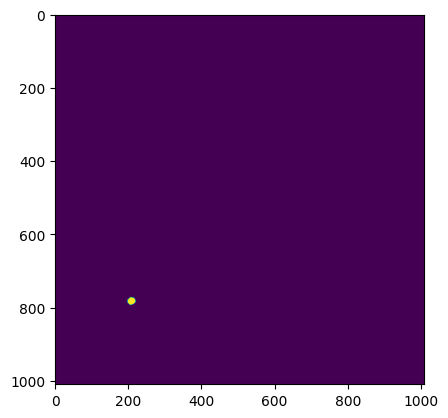

In [263]:
plt.imshow(first_problem_gt_label)

In [264]:
second_problem_gt_label = problem_gt == 97

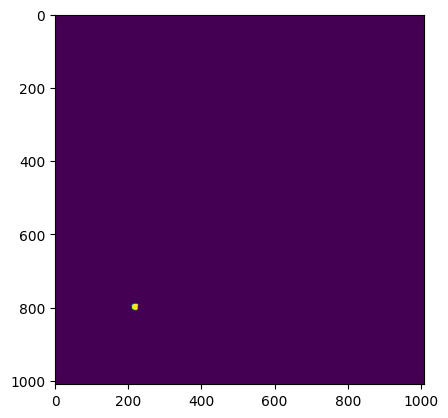

In [265]:
plt.imshow(second_problem_gt_label)

In [266]:
problem_label_mask = problem_label == 150


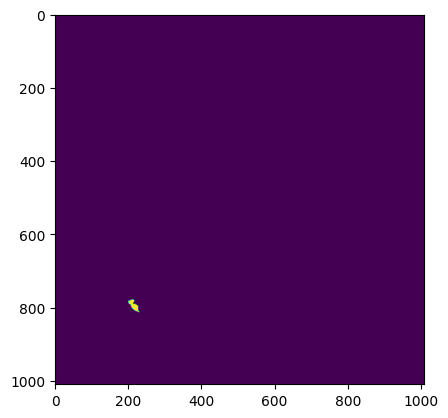

In [267]:
plt.imshow(problem_label_mask)

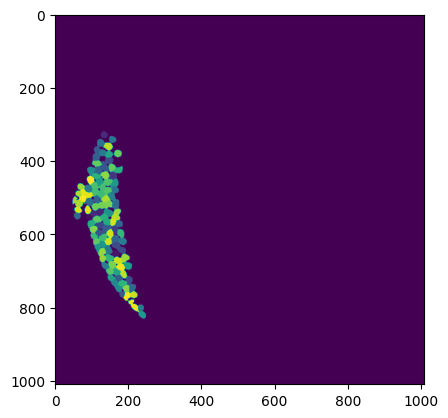

In [258]:
plt.imshow(problem_label)

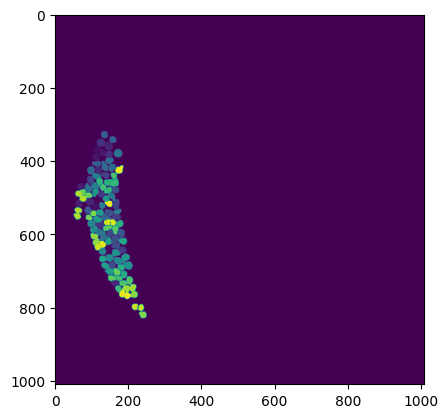

In [261]:
plt.imshow(problem_gt)

In [ ]:
plt.imshow(second_problem_gt_label)

In [268]:
jaccard_score(first_problem_gt_label, problem_label_mask, average="micro")

np.float64(0.2684049079754601)

In [269]:
jaccard_score(second_problem_gt_label, problem_label_mask, average="micro")

np.float64(0.45129224652087474)

In [ ]:
plt.imshow(problem_label_mask)

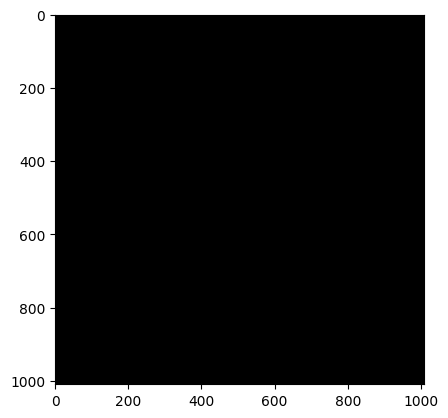

In [135]:
plt.imshow(problem_label_mask.astype(np.uint8)*255, cmap='gray')

In [330]:
label = 1
gt_mask = problem_gt == label
get_label_mask(problem_label, gt_mask, label, 0.913043)

0.001524
0.001524
0.913043


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

array([[<Axes: title={'center': 'J_value'}>]], dtype=object)

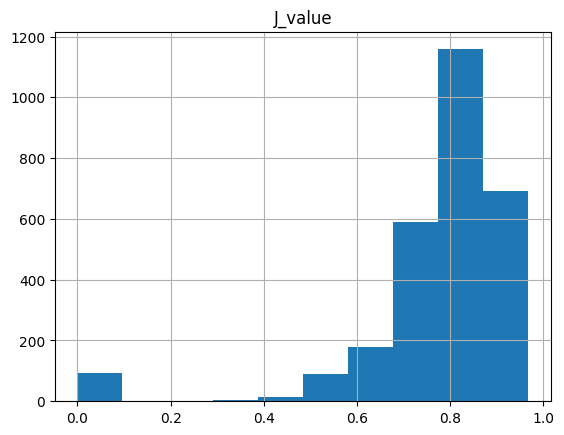

In [362]:
dataset_df.hist('J_value')

In [349]:
np.unique(problem_gt)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105], dtype=uint16)

In [350]:
np.unique(problem_label)

array([  0,  31,  39,  43,  47,  49,  50,  53,  55,  57,  65,  66,  71,
        75,  77,  83,  87,  89,  90,  93,  94,  95,  97,  98,  99, 105,
       107, 109, 111, 113, 115, 117, 119, 123, 124, 125, 126, 127, 129,
       133, 134, 135, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147,
       149, 151, 152, 153, 155, 156, 157, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206], dtype=uint16)

In [352]:
unique_mask_labels = np.unique(problem_label)

In [353]:
unique_mask_labels

array([  0,  31,  39,  43,  47,  49,  50,  53,  55,  57,  65,  66,  71,
        75,  77,  83,  87,  89,  90,  93,  94,  95,  97,  98,  99, 105,
       107, 109, 111, 113, 115, 117, 119, 123, 124, 125, 126, 127, 129,
       133, 134, 135, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147,
       149, 151, 152, 153, 155, 156, 157, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206], dtype=uint16)

In [328]:
np.round(jaccard_score(problem_gt == 1, problem_label == 1, average='micro'),6)

0.001524

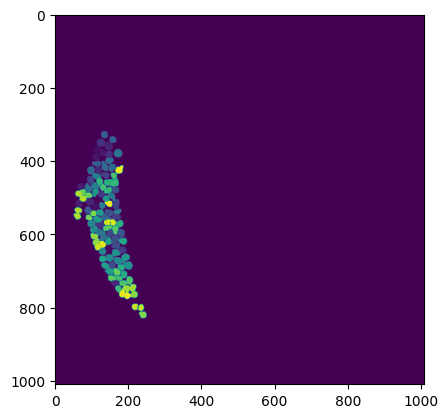

In [347]:
plt.imshow(problem_gt)

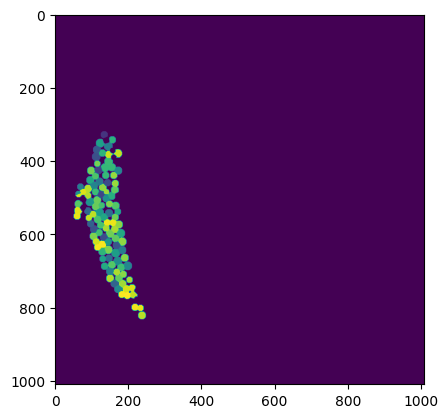

In [348]:
plt.imshow(problem_label)

In [237]:
for row in dataset_df.itertuples():
    merged_gt_image = merge_source_with_mask(row.Mask_file, row.Gt_source_file, row.Gt_mask_file, row.Label, row.J_value)
    tifffile.imwrite(merged_gt_image)
    break

In [44]:
def modify_file_path(mask_file_path, label, out_dir):
    mask_file_path = Path(mask_file_path)
    new_path_name = f"{mask_file_path.stem}_{label}{mask_file_path.suffix}"
    # Create the new path with out_dir as the highest folder
    relative_path = mask_file_path.relative_to(mask_file_path.anchor)  # Get path relative to root
    new_path = Path(out_dir) / relative_path.parent / new_path_name
    
    return new_path

In [248]:
from pathlib import Path

def modify_file_path(file_path, j_value):
    path = Path(file_path)
    new_name = f"{path.stem}*{j_value}*{path.suffix}"
    return path.with_name(new_name)

# Example usage:
original_path = "some/path/image.jpg"
j_value = 0.75
new_path = modify_file_path(original_path, j_value)
print(new_path)


some/path/image*0.75*.jpg


In [116]:
dataset_df.Mask_file.values[0]

'inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/mask0046.tif'

In [121]:
def get_label_mask(mask_file, label):
    tif_image = tifffile.imread(mask_file)
    mask_image = tif_image == label
    return mask_image

In [123]:
mask = get_label_mask('inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/mask0046.tif', 1)

In [125]:
np.unique(mask)

array([False])

In [127]:
tif_image = tifffile.imread('inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ/02_RES/mask0046.tif')

In [178]:
np.unique(tif_image)[1]

3

In [133]:
gt_image = tifffile.imread('inputs-2020-07/BF-C2DL-HSC/02_GT/SEG/man_seg0046.tif')

In [134]:
np.unique(gt_image)

array([0, 1, 2], dtype=uint16)

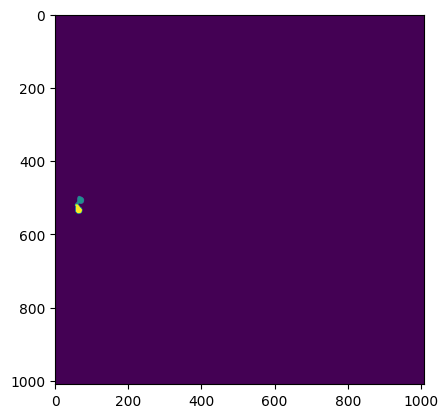

In [135]:
plt.imshow(gt_image)

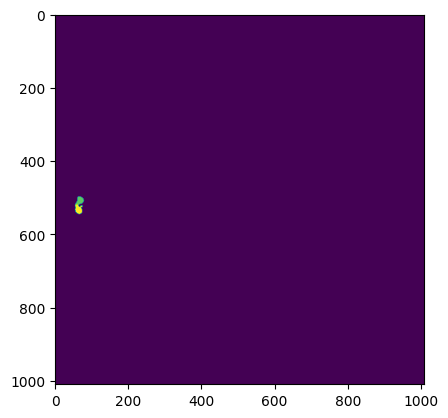

In [136]:
plt.imshow(tif_image)

In [33]:
from sklearn.metrics import jaccard_score

In [152]:
label_mask = (tif_image == 3)
gt_mask = (gt_image == 2)

In [153]:
gt_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [154]:
jaccard_score(gt_mask, label_mask,average="micro")

0.012875536480686695

In [48]:
subdirectories

[PosixPath('inputs-2020-07/BF-C2DL-HSC/01_GT'),
 PosixPath('inputs-2020-07/BF-C2DL-HSC/MU-Lux-CZ'),
 PosixPath('inputs-2020-07/BF-C2DL-HSC/CALT-US'),
 PosixPath('inputs-2020-07/BF-C2DL-HSC/02_GT'),
 PosixPath('inputs-2020-07/BF-C2DL-HSC/DREX-US'),
 PosixPath('inputs-2020-07/BF-C2DL-HSC/KTH-SE (5)'),
 PosixPath('inputs-2020-07/BF-C2DL-HSC/KIT-Sch-GE')]

In [16]:
seg_log_path = "inputs-2020-07/BF-C2DL-HSC/CALT-US/01_RES/SEG_log.txt"
seg_log_path = pathlib.Path(seg_log_path)
with open(seg_log_path, 'r') as f:
    seg_log = f.readlines()

In [ ]:
seg_log

In [64]:
def find_mask_tif(mask_number: int, seg_log_path: Path) -> str:
    seg_log_dir = seg_log_path.parent
    mask_pattern = f"mask*{mask_number:d}.tif"
    all_mask_files = list(seg_log_dir.glob("mask*.tif"))
    
    # Use regex to match the exact number
    number_pattern = re.compile(rf'mask0*{mask_number}\D')
    matching_files = [f for f in all_mask_files if number_pattern.search(f.name)]
    if not matching_files:
        raise FileNotFoundError(f"No mask file found for number {mask_number} in {seg_log_dir}")
    
    if len(matching_files) > 1:
        print(f"Warning: Multiple mask files found for number {mask_number}. Using the first one.")
    
    return str(matching_files[0])

In [157]:
def find_gt_source_tif(gt_number: int, gt_dir_path: Path, seg_log_path: Path) -> str:
    subfolder = seg_log_path.parents[0].name.split('_')[0]
    gt_search_dir = gt_dir_path / subfolder
    gt_pattern = f"t*{gt_number:d}.tif"
    all_gt_files = list(gt_search_dir.glob("t*.tif"))
    
    # Use regex to match the exact number
    number_pattern = re.compile(rf't0*{gt_number}\D')
    matching_files = [f for f in all_gt_files if number_pattern.search(f.name)]
    if not matching_files:
        raise FileNotFoundError(f"No gt source file found for number {gt_number} in {gt_search_dir}")
    
    if len(matching_files) > 1:
        print(f"Warning: Multiple gt source files found for number {gt_number}.: \n {matching_files} Using the first one.")
    
    return str(matching_files[0])

In [158]:
def find_gt_mask_tif(gt_number: int, gt_dir_path: Path, seg_log_path:Path) -> str:
    subfolder = seg_log_path.parents[0].name.split('_')[0]
    subfolder = f"{subfolder}_GT/SEG"
    gt_search_dir = gt_dir_path / subfolder
    all_gt_files = list(gt_search_dir.glob("man*.tif"))
    number_pattern = re.compile(rf'man_seg0*{gt_number}\D')
    matching_files = [f for f in all_gt_files if number_pattern.search(f.name)]
    if not matching_files:
        raise FileNotFoundError(f"No gt mask file found for number {gt_number} in {gt_search_dir}")
    
    if len(matching_files) > 1:
        print(f"Warning: Multiple gt mask file found for number {gt_number}.: \n {matching_files} Using the first one.")
    
    return str(matching_files[0])

In [ ]:
find_gt_tif

In [171]:
def parse_segmentation_data(seg_log_path, gt_dir_path):

    with open(seg_log_path, 'r') as f:
        file_content = f.readlines()
    # Lists to store parsed data
    t_values = []
    mask_files = []
    gt_mask_files = []
    gt_source_files = []
    labels = []
    j_values = []
    
    # Regular expressions to match T value and GT_label/J pairs
    t_pattern = re.compile(r'----------T=(\d+) Z=\d+----------')
    data_pattern = re.compile(r'GT_label=(\d+) J=([\d.]+)')
    
    current_t = None
    current_mask = None
    current_mask_gt = None
    
    for line in file_content:
        t_match = t_pattern.match(line)
        if t_match:
            current_t = int(t_match.group(1))
            current_mask = find_mask_tif(current_t, seg_log_path)
            current_source_gt = find_gt_source_tif(current_t, gt_dir_path, seg_log_path)
            current_mask_gt = find_gt_mask_tif(current_t, gt_dir_path, seg_log_path)
        else:
            data_match = data_pattern.match(line)
            if data_match and current_t is not None:
                label = int(data_match.group(1))
                j_value = float(data_match.group(2))
                mask_files.append(current_mask)
                gt_source_files.append(current_source_gt)
                gt_mask_files.append(current_mask_gt)
                labels.append(label)
                j_values.append(j_value)
    
    return pd.DataFrame({
        'Mask_file': mask_files,
        'Gt_source_file': gt_source_files,
        'Gt_mask_file': gt_mask_files,
        'Label': labels,
        'J_value': j_values
    })

In [40]:
parse_segmentation_data(seg_log, seg_log_path)

,Mask_file,Label,J_value
0,inputs-2020-07/BF-C2DL-HSC/CALT-US/01_RES/mask...,1,0.952854
1,inputs-2020-07/BF-C2DL-HSC/CALT-US/01_RES/mask...,1,0.873656
2,inputs-2020-07/BF-C2DL-HSC/CALT-US/01_RES/mask...,1,0.856287
3,inputs-2020-07/BF-C2DL-HSC/CALT-US/01_RES/mask...,1,0.908665
4,inputs-2020-07/BF-C2DL-HSC/CALT-US/01_RES/mask...,1,0.919799
...,...,...,...
250,inputs-2020-07/BF-C2DL-HSC/CALT-US/01_RES/mask...,8,0.916870
251,inputs-2020-07/BF-C2DL-HSC/CALT-US/01_RES/mask...,9,0.923780
252,inputs-2020-07/BF-C2DL-HSC/CALT-US/01_RES/mask...,10,0.922388
253,inputs-2020-07/BF-C2DL-HSC/CALT-US/01_RES/mask...,11,0.839552
